Punto 3 , Geodinámica

In [1]:
%pylab inline
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


Will the Nazca plate disappear? If so, when? Remember to clearly state your assumptions and show your calculations.

In [2]:
#Funciones

def Magnitude(r):
    return sqrt(r[0]**2+r[1]**2+r[2]**2)

def Cross(R1,R2):
    return np.cross(R1,R2)

def RelativeVelocity (vel,latitude,longitude,latEu,lonEu):
    #Convertir unidades de las coordenadas y omega a radianes
    #Parametros
    radio_tierra =6371*10**3 #(m)
    latitude=radians(latitude)
    longitude=radians(longitude)
    latEu=radians(latEu)
    lonEu=radians(lonEu)
    vel=vel*(numpy.pi/180) #rad/yr
   
    
    #Coordenadas en radianes se convierten a coordenadas cartesianas globales
    P=[sin((np.pi/2)-latitude)*cos(longitude),cos(latitude)*sin(longitude),sin(latitude)]
    QP=[vel*sin((np.pi/2)-latEu)*cos(lonEu),vel*cos(latEu)*sin(lonEu),vel*sin(latEu)]
    v=radio_tierra*Cross(P,QP)
    
    #Matriz de rotación para convertir las cordenadas globales a cordenadas locales
    Tr=np.zeros((3,3))
    #se llena
    Tr[0][0]=-sin(latitude)*cos(longitude)
    Tr[0][1]=-sin(latitude)*sin(longitude)
    Tr[0][2]=cos(latitude)
    Tr[1][0]=-sin(longitude)
    Tr[1][1]=cos(longitude)
    Tr[1][2]=0
    Tr[2][0]=-cos(latitude)*cos(longitude)
    Tr[2][1]=-cos(latitude)*sin(longitude)
    Tr[2][2]=-sin(latitude)
    
    #Multiplicación de la Matriz de transformcaión con el Vector de Velocidad
    V=np.matrix(v).T
    Vel_tan= Tr*V
    
    #Devuelve el vector calculado   
    return Vel_tan

Valores encontrados en la tabla Nuvel 1, para los vectores de rotación realtivos a la placa Nazca-Sur America. Coordenadas ubicadas en el extremo occidental de la placa de Nazca. 

In [7]:
Va = RelativeVelocity(7.6*10**-7,-21.44445556,-114.30138889,56,-94)
print (Va)

FINAL=Magnitude(Va) 
print ("La magnitud de la velocidad es ",FINAL," m/yr")


[[  1.63959885e-02]
 [ -8.14139625e-02]
 [  5.20417043e-18]]
La magnitud de la velocidad es  [[ 0.08304855]]  m/yr


Para poder saber si la placa de Nazca va a desaparecer por debajo de la placa Sudamericana es necesario saber la tasa de creación de corteza del ridge del Pacifico y la tasa de corteza que se consume en la subducción de Sudamérica. 
La tasa de subducción que se obtuvo para la placa de Nazca fue de [0.08304855]  m/yr , la cual se calculó mediante el código presentado en este notebook.
Por otro lado, para saber la tasa de creación de corteza se consultó DeMets et al. (2010), en donde se encontró que la tasa es de [ 0.14 ] m/yr para las coordenadas utilizadas aproximadamente.
A partir de los cálculos presentados se puede afirmar que el punto más al occidente de la placa de Nazca se encuentra a 4400 km de la zona de subducción. De acuerdo a los valores obtenidos, si no se tiene en cuenta la tasa de creación de corteza en el ridge del pacifico, Nazca desaparecería en aproximadamnete 53 millones de años. No obstante, formular un modelo sin tener en cuenta la tasa a la cual se crea corteza en el pacifico sería equivocado; por esta razón, se concluyó que la tasa de creación de corteza es mayor a la tasa de subducción, de esta manera es posible afirmar que en condiciones normales será mayor la cantidad de corteza que se crea que la cantidad de corteza que se destruye entonces la placa de Nazca no va a desaparecer.


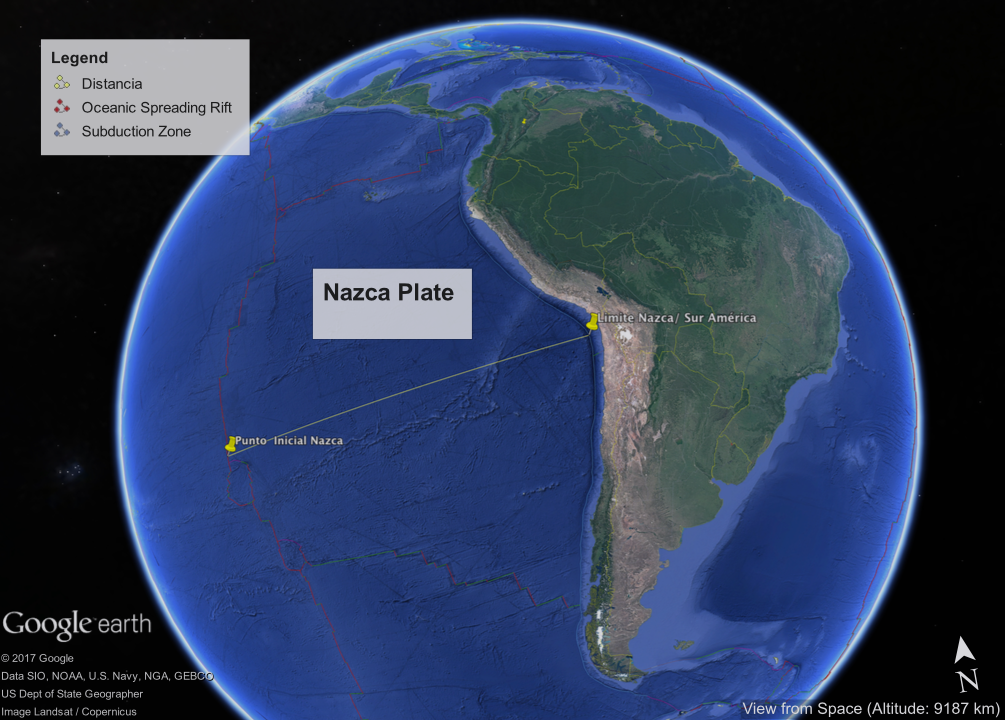

In [8]:
from IPython.display import Image
Image(filename='nazca.png')